In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
!pip install fastai
!pip install torch

    100% |████████████████████████████████| 122kB 6.0MB/s 
    100% |████████████████████████████████| 1.5MB 8.3MB/s 
    100% |████████████████████████████████| 112kB 19.9MB/s 
    100% |████████████████████████████████| 184kB 16.3MB/s 
    100% |████████████████████████████████| 3.6MB 8.2MB/s 
    100% |████████████████████████████████| 496.4MB 32kB/s 
    100% |████████████████████████████████| 51kB 21.1MB/s 
    100% |████████████████████████████████| 2.2MB 886kB/s 
    100% |████████████████████████████████| 61kB 23.8MB/s 
    100% |████████████████████████████████| 11.6MB 2.5MB/s 
    100% |████████████████████████████████| 92kB 23.5MB/s 
    100% |████████████████████████████████| 71kB 23.3MB/s 
    100% |████████████████████████████████| 901kB 2.6MB/s 
    100% |████████████████████████████████| 112kB 30.1MB/s 
    100% |████████████████████████████████| 81kB 28.0MB/s 
    100% |████████████████████████████████| 15.8MB 2.3MB/s 
    100% |████████████████████████████████| 4.4MB 

In [0]:
# This file contains all the main external libs we'll use# This  
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [76]:
!wget https://github.com/AI6-Bangalore-Chapter/2018-cycle-2/blob/master/Sessions/Session_4/appleorange.zip


Redirecting output to ‘wget-log’.


In [10]:
from google.colab import files
uploaded = files.upload()

Saving appleorange.zip to appleorange.zip


In [11]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "appleorange.zip" with length 1045635 bytes


In [12]:
!ls
!unzip appleorange.zip

appleorange.zip  sample_data
Archive:  appleorange.zip
   creating: appleorange/test/
   creating: appleorange/test/apple/
  inflating: appleorange/test/apple/apple_010.jpg  
  inflating: appleorange/test/apple/apple_011.jpg  
  inflating: appleorange/test/apple/apple_016.jpg  
  inflating: appleorange/test/apple/apple_019.jpg  
  inflating: appleorange/test/apple/apple_036.jpg  
  inflating: appleorange/test/apple/apple_040.jpg  
  inflating: appleorange/test/apple/apple_043.jpg  
  inflating: appleorange/test/apple/apple_045.jpg  
  inflating: appleorange/test/apple/apple_050.jpg  
  inflating: appleorange/test/apple/apple_056.jpg  
  inflating: appleorange/test/apple/apple_057.jpg  
  inflating: appleorange/test/apple/apple_059.jpg  
   creating: appleorange/test/orange/
  inflating: appleorange/test/orange/orange_001.jpg  
  inflating: appleorange/test/orange/orange_012.jpg  
  inflating: appleorange/test/orange/orange_014.jpg  
  inflating: appleorange/test/orange/orange_016.jpg  

In [0]:
PATH = "appleorange/"
sz=224

In [34]:
os.listdir(PATH)

['train', 'valid']

In [36]:
os.listdir(f'{PATH}valid')

['orange', 'apple']

In [37]:
files = os.listdir(f'{PATH}valid/apple')[:5]
files

['apple_011.jpg',
 'apple_056.jpg',
 'apple_036.jpg',
 'apple_057.jpg',
 'apple_019.jpg']

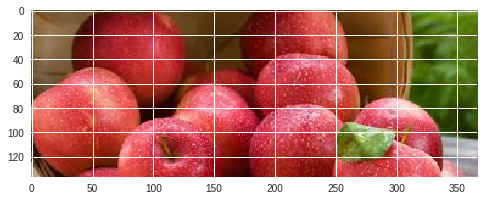

In [39]:
img = plt.imread(f'{PATH}valid/apple/{files[2]}')
plt.imshow(img);

In [40]:
img.shape

(137, 367, 3)

In [41]:
img[:4,:4]

array([[[157, 129,  92],
        [141, 113,  76],
        [117,  89,  50],
        [ 96,  66,  28]],

       [[150, 122,  85],
        [142, 114,  77],
        [128,  98,  60],
        [108,  79,  39]],

       [[142, 114,  75],
        [144, 114,  76],
        [139, 109,  71],
        [125,  93,  54]],

       [[142, 112,  74],
        [144, 114,  76],
        [145, 113,  74],
        [137, 104,  63]]], dtype=uint8)

In [48]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 20)

epoch      trn_loss   val_loss   accuracy   
    0      0.768706   0.592636   0.625     
    1      0.709767   0.52215    0.708333  
    2      0.607163   0.377444   0.875     
    3      0.494679   0.2448     0.916667  
    4      0.413243   0.17691    0.916667  
    5      0.363186   0.151252   0.958333  
    6      0.309249   0.155264   0.958333  
    7      0.27271    0.167477   0.958333  
    8      0.239798   0.182408   0.958333  
    9      0.213371   0.195857   0.958333  
    10     0.191896   0.207874   0.958333  
    11     0.174114   0.220517   0.958333  
    12     0.159777   0.231626   0.958333  
    13     0.147149   0.239442   0.958333  
    14     0.135011   0.246264   0.958333  
    15     0.125116   0.252494   0.958333  
    16     0.11637    0.261182   0.958333  
    17     0.108113   0.26008    0.958333  
    18     0.100519   0.26316    0.958333  
    19     0.094122   0.264218   0.958333  



[array([0.26422]), 0.9583333134651184]

In [49]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['apple', 'orange']

In [51]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(24, 2)

In [52]:
log_preds[:10]

array([[ -0.00019,  -8.57938],
       [ -0.01719,  -4.07214],
       [ -0.00103,  -6.87402],
       [ -0.00332,  -5.71087],
       [ -0.00001, -11.32132],
       [ -0.52215,  -0.89954],
       [ -0.00069,  -7.27357],
       [ -0.00091,  -7.00637],
       [ -0.00001, -11.9977 ],
       [ -0.01268,  -4.37373]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(orange)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


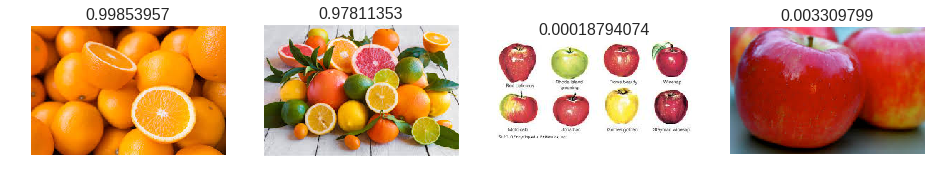

In [75]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


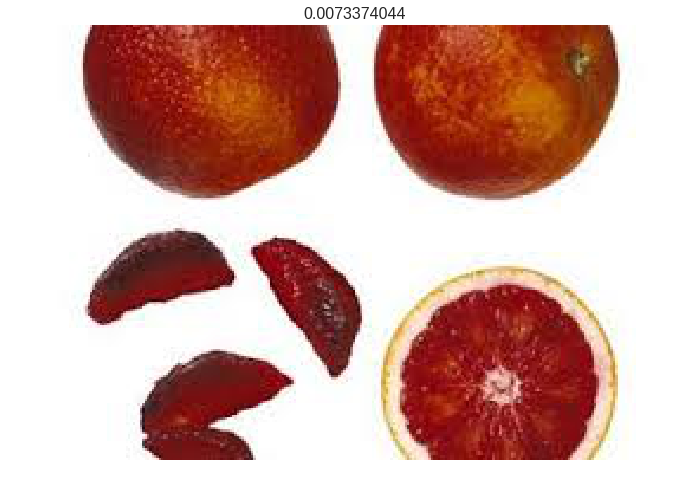

In [73]:
# 2. A few incorrect labels at random
#rand_by_correct(False)
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct apples


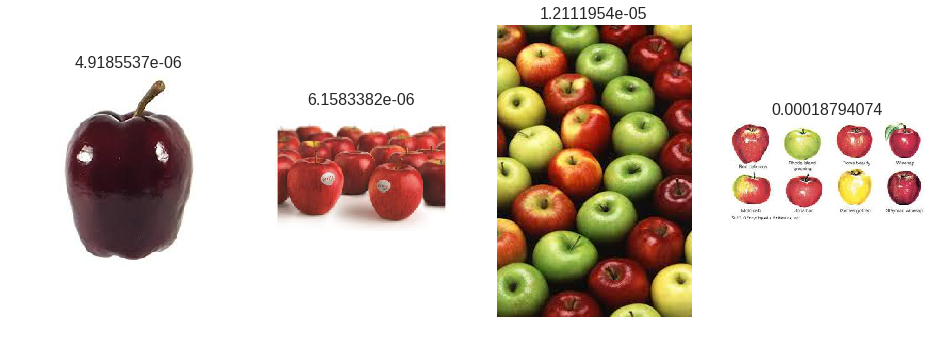

In [61]:
plot_val_with_title(most_by_correct(0, True), "Most correct apples")

Most correct orange


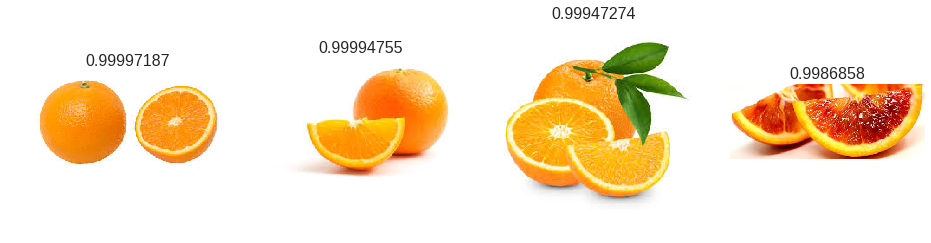

In [62]:
plot_val_with_title(most_by_correct(1, True), "Most correct orange")

In [63]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect apple")

Most incorrect apple
Not Found.


Most incorrect orange


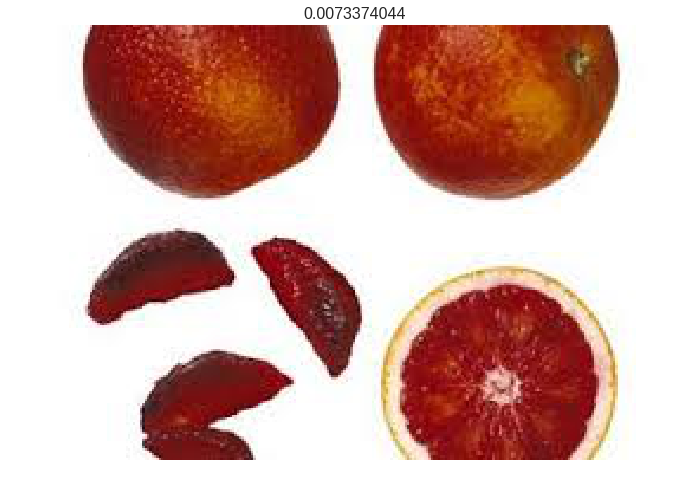

In [64]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect orange")

Most uncertain predictions


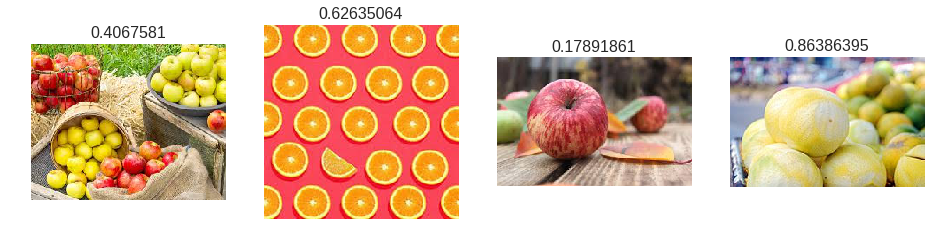

In [65]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [77]:
!ls

appleorange  appleorange.zip  appleorange.zip.1  sample_data  wget-log
